In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
%matplotlib inline

In [7]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
all_data = train_df.append(test_df)
all_data.reset_index(inplace=True,drop=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [9]:
split_index = train_df.shape[0]
train_data = all_data[:split_index]

In [5]:
y_train = pd.get_dummies(all_data[:split_index]['class'],prefix='class_')
y_train.head()

,class__0.0,class__1.0,class__2.0,class__3.0,class__4.0,class__5.0
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0


In [153]:
all_data.columns

Index(['_id', 'appearedHour', 'appearedMinute', 'appearedTimeOfDay', 'city',
       'class', 'closeToWater', 'continent', 'cooc_1', 'cooc_10',
       ...
       'pressure', 'rural', 'suburban', 'temperature', 'terrainType', 'urban',
       'weather', 'weatherIcon', 'windBearing', 'windSpeed'],
      dtype='object', length=185)

> 分成category 和continous

In [154]:
category_type = ['appearedTimeOfDay','terrainType','closeToWater','city','continent','weather','weatherIcon','rural'
                 ,'rural','midurban','suburban','urban','gymIn1000m', 'gymIn100m', 'gymIn2500m', 'gymIn250m', 
                 'gymIn5000m','gymIn500m','pokestopIn1000m', 'pokestopIn100m', 'pokestopIn2500m',
       'pokestopIn250m', 'pokestopIn5000m', 'pokestopIn500m']

for i in range(151):
    cooc_name = 'cooc_'+str(i+1)
    category_type.append(cooc_name)
    
continous_type=['appearedHour','appearedMinute','temperature','windSpeed','windBearing','pressure','population_density','gymDistanceKm',
               'pokestopDistanceKm']

> 將['appearedTimeOfDay','terrainType','city','continent','weather','weatherIcon'] getdummy後再把原來drop掉

In [155]:
temp_col = all_data[category_type].select_dtypes(exclude=['bool']).columns

for col in temp_col:
    temp_df = pd.get_dummies(all_data[col],prefix=str(col)+'_')
    all_data=pd.concat([all_data,temp_df],axis=1)

> drop 不用的column

In [156]:
all_data.drop(['appearedTimeOfDay','terrainType','city','continent','weather','weatherIcon'],axis=1,inplace=True)

In [157]:
all_data.drop(['_id'],axis=1,inplace=True)

In [158]:
all_data.drop(['class'],axis=1,inplace=True)

> 將boolean 轉成0,1

In [159]:
all_data.select_dtypes(include=['bool']).columns

Index(['closeToWater', 'cooc_1', 'cooc_10', 'cooc_100', 'cooc_101', 'cooc_102',
       'cooc_103', 'cooc_104', 'cooc_105', 'cooc_106',
       ...
       'midurban', 'pokestopIn1000m', 'pokestopIn100m', 'pokestopIn2500m',
       'pokestopIn250m', 'pokestopIn5000m', 'pokestopIn500m', 'rural',
       'suburban', 'urban'],
      dtype='object', length=168)

In [160]:
all_data[all_data.select_dtypes(include=['bool']).columns] = all_data.select_dtypes(include=['bool'])*1


In [161]:
all_data.head()

,appearedHour,appearedMinute,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,...,weather__Windy,weather__WindyandFoggy,weatherIcon__clear-day,weatherIcon__clear-night,weatherIcon__cloudy,weatherIcon__fog,weatherIcon__partly-cloudy-day,weatherIcon__partly-cloudy-night,weatherIcon__rain,weatherIcon__wind
0,8,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,4,41,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3,6,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,23,33,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,14,48,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


> 出現的時間和分鐘全都轉成分鐘

In [162]:
all_data['appear_to_minutes'] = all_data['appearedHour']*60+all_data['appearedMinute']
all_data[['appear_to_minutes']].head()

,appear_to_minutes
0,482
1,281
2,186
3,1413
4,888


In [163]:
all_data.drop(['appearedHour','appearedMinute'],axis=1,inplace=True)

In [164]:
all_data.dtypes.value_counts()

object     169
uint8      141
float64      5
int64        2
dtype: int64

> object轉成float

In [174]:
all_data[all_data.select_dtypes(include=['object']).columns] = all_data.select_dtypes(include=['object'])*1



In [175]:
all_data[all_data.select_dtypes(include=['object']).columns] = all_data[all_data.select_dtypes(include=['object']).columns].astype('float64')



In [167]:
all_data['pokestopDistanceKm']=pd.to_numeric(all_data['pokestopDistanceKm'],errors='coerce')

> pokestopDistanceKm 有缺值

In [168]:
train_data.isnull().sum()[train_data.isnull().sum()!=0]

Series([], dtype: int64)

In [169]:
all_data['pokestopDistanceKm'].isnull().sum()

4

> 先補平均值

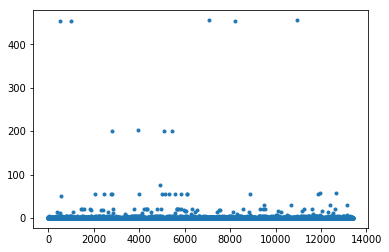

In [170]:
plt.plot(np.arange(len(all_data['pokestopDistanceKm'])),all_data['pokestopDistanceKm'],'.')

In [171]:
pokestopDistanceKm_mean = all_data['pokestopDistanceKm'][all_data['pokestopDistanceKm']<20].mean()
                                                         
                                                         

In [172]:
all_data['pokestopDistanceKm'].fillna(pokestopDistanceKm_mean,inplace=True)

In [173]:
all_data.dtypes.value_counts()

object     168
uint8      141
float64      6
int64        2
dtype: int64

# 觀察


In [75]:
temp_train_data = all_data[:split_index]
temp_train_data.head()

,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,...,weather__WindyandFoggy,weatherIcon__clear-day,weatherIcon__clear-night,weatherIcon__cloudy,weatherIcon__fog,weatherIcon__partly-cloudy-day,weatherIcon__partly-cloudy-night,weatherIcon__rain,weatherIcon__wind,appear_to_minutes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,482
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,281
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,186
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1413
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,888


In [83]:
np.sum(y_train.values,axis=0)

array([1400, 1428,  858, 3117, 1976, 1935], dtype=uint64)

> float和int轉小一點

In [59]:
all_data[all_data.columns[all_data.dtypes.values == 'int64']]=all_data[all_data.columns[all_data.dtypes.values == 'int64']].astype('int16')

In [60]:
all_data[all_data.select_dtypes(include=['float64']).columns] = all_data[all_data.select_dtypes(include=['float64']).columns].astype('float16')

In [129]:
y_train = y_train.values

# data normalize

In [176]:
from sklearn.preprocessing import scale

In [177]:
scale_all_data = scale(all_data)
train_data = scale_all_data[:split_index].copy()
test_data = scale_all_data[split_index:].copy()

In [178]:
train_data.shape

(10714, 317)

In [179]:
y_train_nosplit = y_train

In [29]:
y_train_nosplit.shape

(10714, 6)

# split training and validating data

In [88]:
from sklearn.model_selection import train_test_split


In [90]:
np.random.choice([0.1,0.2,0.3])

3

In [98]:
from sklearn.utils import shuffle

In [110]:
for i in range(8):
    print(shuffle([[1,2,3,4,5],[1,1,1,1,1]]))

[[1, 1, 1, 1, 1], [1, 2, 3, 4, 5]]
[[1, 1, 1, 1, 1], [1, 2, 3, 4, 5]]
[[1, 1, 1, 1, 1], [1, 2, 3, 4, 5]]
[[1, 1, 1, 1, 1], [1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5], [1, 1, 1, 1, 1]]
[[1, 1, 1, 1, 1], [1, 2, 3, 4, 5]]
[[1, 2, 3, 4, 5], [1, 1, 1, 1, 1]]
[[1, 2, 3, 4, 5], [1, 1, 1, 1, 1]]


In [126]:
all_data.head()

,closeToWater,cooc_1,cooc_10,cooc_100,cooc_101,cooc_102,cooc_103,cooc_104,cooc_105,cooc_106,...,weather__WindyandFoggy,weatherIcon__clear-day,weatherIcon__clear-night,weatherIcon__cloudy,weatherIcon__fog,weatherIcon__partly-cloudy-day,weatherIcon__partly-cloudy-night,weatherIcon__rain,weatherIcon__wind,appear_to_minutes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,482
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,0,0,281
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,186
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,1413
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,0,0,888


In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_validate, y_train, y_validate = train_test_split(train_data,y_train_nosplit,test_size=0.3,random_state=42,stratify=y_train_nosplit)


In [43]:
X_train.shape

(7499, 317)

In [44]:
y_train.shape

(7499, 6)

# save best model

In [140]:
import os

In [141]:

#先指定主路徑
maindir='./models'
if not os.path.exists(maindir):
    os.makedirs(maindir)
    

# train data batch generator

In [142]:
from sklearn.utils import shuffle
def train_batch_generator(x, y, bs, shape):
    x_train_ = np.array([]).reshape((0, shape))
    y_train_ = np.array([]).reshape((0, y.shape[1]))
    while True:
        new_ind = shuffle(range(len(x)))
        x = np.take(x,new_ind,axis=0)
        y = np.take(y, new_ind, axis=0)

#         return np.row_stack([x_train_, x[0]])
        
        for i in range(len(x)):
            x_train_ = np.row_stack([x_train_, x[i]])
            y_train_ = np.row_stack([y_train_, y[i]])
            if x_train_.shape[0] == bs:
                x_batch = x_train_.copy()
                y_batch = y_train_.copy()
                x_train_ = np.array([]).reshape((0 ,shape))
                y_train_ = np.array([]).reshape((0 ,y.shape[1]))        
                yield x_batch, y_batch

# create graph

In [186]:
tf.reset_default_graph() 

input_data = tf.placeholder(dtype=tf.float32, 
                           shape=[None, X_train.shape[1]],
                           name='input_data')

y_true = tf.placeholder(dtype=tf.float32, 
                        shape=[None, y_train.shape[1]],
                        name='y_true')

drp_rate = tf.placeholder(dtype=tf.float32, name = 'dropout')
is_train = tf.placeholder(dtype=tf.bool)

#新增l2 placeholder
# l2 = tf.placeholder(dtype=tf.float32, name = 'l2_regulizers')  

#### define variables(weight/bias) ####
x1 = tf.layers.dense(input_data, 
                     512, 
                     activation=tf.nn.relu, 
                     name='hidden1', 
                     )

x1 = tf.layers.dropout(inputs=x1, rate=drp_rate, training=is_train)

x2 = tf.layers.dense(x1, 
                     512, 
                     activation=tf.nn.relu, 
                     name='hidden2',
                     )

x2 = tf.layers.dropout(inputs=x2, rate=drp_rate, training=is_train)

x3 = tf.layers.dense(x2, 
                     128, 
                     activation=tf.nn.relu, 
                     name='hidden3',
                     )
x3 = tf.layers.dropout(inputs=x3, rate=drp_rate, training=is_train)

out = tf.layers.dense(x3, y_train.shape[1], name='output')

y_pred = tf.nn.softmax(out)


cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=out))
opt = tf.train.AdamOptimizer(learning_rate=0.0002)

reg = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = cross_entropy + tf.reduce_sum(reg)
update = opt.minimize(loss)


In [187]:
from tqdm import tqdm_notebook
import time
from sklearn.metrics import accuracy_score

In [194]:
epochs = 100
bs = 64
update_per_epoch = 50
drop_rate = 0.4
n_estimaor=15

In [189]:
from sklearn.model_selection import KFold

In [190]:
# X_train_list = []
# y_train_list = []
# X_test_list = []
# y_test_list = []

# kf = KFold(n_splits=5,random_state=None,shuffle=False)
# for train_index,test_index in kf.split(train_data):
#     X_train , X_test = train_data[train_index],train_data[test_index]
#     y_train , y_test = y_train_nosplit[train_index],y_train_nosplit[test_index]
    
#     X_train_list.append(X_train)
#     y_train_list.append(y_train)
#     X_test_list.append(X_test)
#     y_test_list.append(y_test)
    
# X_train_list.append(train_data)
# y_train_list.append(y_train_nosplit)
# X_test_list.append(X_validate)
# y_test_list.append(y_validate)

In [195]:
print('start modelling!')
predict_list=[]

for i in range(n_estimaor):
    ind_temp = shuffle(range(len(train_data)))
    temp_x = np.take(train_data,ind_temp,axis=0)
    temp_y = np.take(y_train_nosplit,ind_temp,axis=0)
    
    X_tr,X_te,y_tr,y_te = train_test_split(temp_x,temp_y,test_size=0.3,random_state=False,stratify=y_train_nosplit)
    
    sess = tf.Session()
    sess.run(tf.global_variables_initializer())


    patience = 5
    n_patience = 0
    current_loss=1000000

    tr_loss = list()
    te_loss = list()
    tr_acc = list()
    te_acc = list()
    

    
    
    train_gen = train_batch_generator(X_tr, y_tr, bs, train_data.shape[1])

    print('model {} start!'.format(i))

    for epoch in range(epochs):
        training_loss = 0
        training_acc = 0
        bar = tqdm_notebook(range(update_per_epoch))
        for j in bar:
            x_batch, y_batch = next(train_gen)

            tr_pred, training_loss_batch, _ = sess.run([y_pred, loss, update], feed_dict={
                input_data:x_batch,
                y_true:y_batch,
                drp_rate: drop_rate,
                is_train: True
            })

            training_loss += training_loss_batch

            training_acc_batch = accuracy_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1))
            training_acc += training_acc_batch

            training_acc = accuracy_score(np.argmax(y_batch, axis=1), np.argmax(tr_pred, axis=1))


            te_pred, testing_loss = sess.run([y_pred, loss], feed_dict={
                input_data:X_te,
                y_true:y_te,
                drp_rate: 0,
                is_train: False
            })



            testing_acc = accuracy_score(np.argmax(y_te, axis=1), np.argmax(te_pred, axis=1))
            tr_loss.append(training_loss)
            te_loss.append(testing_loss)
            tr_acc.append(training_acc)
            te_acc.append(testing_acc)

        print('epoch {epochs}: training loss {training_loss} ; testing loss {testing_loss}'.format(
                epochs=(epoch+1), 
                training_loss=training_loss,
                testing_loss=testing_loss))
    
        if testing_loss > np.min(te_loss):
            n_patience += 1
        else:
            n_patience = 0

        if n_patience >= patience:
            print("The model didn't improve for %i rounds, break it!" % patience)
            break
    te_pred = sess.run(y_pred, feed_dict={
        input_data:test_data,
        drp_rate: 0,
        is_train: False
    })
    predict_list.append(te_pred)
        # save best model
#         if testing_loss <= np.min(te_loss):
#             saver = tf.train.Saver()
#             saver.save(sess, "./models/best_model.ckpt")





start modelling!
model 0 start!


epoch 1: training loss 98.11544096469879 ; testing loss 1.7040787935256958


epoch 2: training loss 87.88147616386414 ; testing loss 1.659920334815979


epoch 3: training loss 84.48099398612976 ; testing loss 1.611864686012268


epoch 4: training loss 82.12687623500824 ; testing loss 1.5548192262649536


epoch 5: training loss 80.4517891407013 ; testing loss 1.4908859729766846


epoch 6: training loss 77.6776909828186 ; testing loss 1.4383461475372314


epoch 7: training loss 74.89913702011108 ; testing loss 1.391761064529419


epoch 8: training loss 73.80837321281433 ; testing loss 1.3730062246322632


epoch 9: training loss 71.41403412818909 ; testing loss 1.3388007879257202


epoch 10: training loss 68.98647320270538 ; testing loss 1.3165374994277954


epoch 11: training loss 68.0743715763092 ; testing loss 1.3004120588302612


epoch 12: training loss 67.82842636108398 ; testing loss 1.285227656364441


epoch 13: training loss 66.19547641277313 ; testing loss 1.2837949991226196


epoch 14: training loss 66.90879392623901 ; testing loss 1.270026445388794


epoch 15: training loss 64.98859876394272 ; testing loss 1.2694898843765259


epoch 16: training loss 65.66220927238464 ; testing loss 1.259925365447998


epoch 17: training loss 63.56484651565552 ; testing loss 1.2510241270065308


epoch 18: training loss 63.78894478082657 ; testing loss 1.2470394372940063


epoch 19: training loss 63.94642496109009 ; testing loss 1.243561863899231


epoch 20: training loss 62.63631296157837 ; testing loss 1.2395401000976562


epoch 21: training loss 61.94228261709213 ; testing loss 1.2359181642532349


epoch 22: training loss 61.326852321624756 ; testing loss 1.2346380949020386


epoch 23: training loss 61.253249764442444 ; testing loss 1.2341185808181763


epoch 24: training loss 61.28368026018143 ; testing loss 1.2310173511505127


epoch 25: training loss 62.08267802000046 ; testing loss 1.2342935800552368


epoch 26: training loss 60.92836630344391 ; testing loss 1.2352954149246216


epoch 27: training loss 58.94994407892227 ; testing loss 1.227941632270813


epoch 28: training loss 60.21414637565613 ; testing loss 1.2301748991012573


epoch 29: training loss 59.18633568286896 ; testing loss 1.2261531352996826
The model didn't improve for 5 rounds, break it!
model 1 start!


epoch 1: training loss 95.13217830657959 ; testing loss 1.672585129737854


epoch 2: training loss 87.91807889938354 ; testing loss 1.621600866317749


epoch 3: training loss 83.99244093894958 ; testing loss 1.5621944665908813


epoch 4: training loss 81.80376994609833 ; testing loss 1.511938214302063


epoch 5: training loss 78.22616589069366 ; testing loss 1.4537322521209717


epoch 6: training loss 74.55750405788422 ; testing loss 1.4079358577728271


epoch 7: training loss 74.71983706951141 ; testing loss 1.386031985282898


epoch 8: training loss 71.97323834896088 ; testing loss 1.3617212772369385


epoch 9: training loss 69.1486269235611 ; testing loss 1.3327301740646362


epoch 10: training loss 67.97363102436066 ; testing loss 1.319932460784912


epoch 11: training loss 68.55831050872803 ; testing loss 1.3059312105178833


epoch 12: training loss 67.16106176376343 ; testing loss 1.289218783378601


epoch 13: training loss 65.99934947490692 ; testing loss 1.2841143608093262


epoch 14: training loss 65.90893256664276 ; testing loss 1.2737996578216553


epoch 15: training loss 66.0894228219986 ; testing loss 1.2758079767227173


epoch 16: training loss 63.609004855155945 ; testing loss 1.2616244554519653


epoch 17: training loss 63.99820411205292 ; testing loss 1.2626680135726929


epoch 18: training loss 62.286426424980164 ; testing loss 1.251347541809082


epoch 19: training loss 62.77039051055908 ; testing loss 1.2508355379104614


epoch 20: training loss 61.975268483161926 ; testing loss 1.2467405796051025


epoch 21: training loss 60.925711274147034 ; testing loss 1.2469145059585571


epoch 22: training loss 59.907105565071106 ; testing loss 1.245286226272583


epoch 23: training loss 60.676749765872955 ; testing loss 1.2453237771987915


epoch 24: training loss 60.71449398994446 ; testing loss 1.244229793548584


epoch 25: training loss 59.00353288650513 ; testing loss 1.2409679889678955


epoch 26: training loss 59.882609367370605 ; testing loss 1.240647315979004


epoch 27: training loss 59.52090901136398 ; testing loss 1.2394492626190186


epoch 28: training loss 60.02181625366211 ; testing loss 1.2361961603164673


epoch 29: training loss 58.08910936117172 ; testing loss 1.239122748374939


epoch 30: training loss 58.107120513916016 ; testing loss 1.237292766571045


epoch 31: training loss 57.972320795059204 ; testing loss 1.2358250617980957


epoch 32: training loss 59.359303414821625 ; testing loss 1.2359554767608643


epoch 33: training loss 57.60480558872223 ; testing loss 1.2361210584640503
The model didn't improve for 5 rounds, break it!
model 2 start!


epoch 1: training loss 94.73364639282227 ; testing loss 1.683030128479004


epoch 2: training loss 88.62835359573364 ; testing loss 1.633242130279541


epoch 3: training loss 84.4397361278534 ; testing loss 1.5740457773208618


epoch 4: training loss 80.42845821380615 ; testing loss 1.514142394065857


epoch 5: training loss 78.69503784179688 ; testing loss 1.4528722763061523


epoch 6: training loss 75.73851990699768 ; testing loss 1.402382731437683


epoch 7: training loss 72.88168692588806 ; testing loss 1.3545345067977905


epoch 8: training loss 71.96776914596558 ; testing loss 1.328991174697876


epoch 9: training loss 70.32137894630432 ; testing loss 1.3048522472381592


epoch 10: training loss 69.77681088447571 ; testing loss 1.2854650020599365


epoch 11: training loss 68.35936391353607 ; testing loss 1.2765175104141235


epoch 12: training loss 67.28023171424866 ; testing loss 1.2603665590286255


epoch 13: training loss 65.5095522403717 ; testing loss 1.2580082416534424


epoch 14: training loss 67.13106524944305 ; testing loss 1.2462469339370728


epoch 15: training loss 64.62055718898773 ; testing loss 1.2473617792129517


epoch 16: training loss 65.40386712551117 ; testing loss 1.2464191913604736


epoch 17: training loss 64.53255236148834 ; testing loss 1.236124038696289
The model didn't improve for 5 rounds, break it!
model 3 start!


epoch 1: training loss 98.16510546207428 ; testing loss 1.6727339029312134


epoch 2: training loss 87.93470871448517 ; testing loss 1.6212068796157837


epoch 3: training loss 84.32796704769135 ; testing loss 1.565996766090393


epoch 4: training loss 81.12656044960022 ; testing loss 1.499802827835083


epoch 5: training loss 78.90067541599274 ; testing loss 1.440428614616394


epoch 6: training loss 75.5123804807663 ; testing loss 1.3979405164718628


epoch 7: training loss 74.33021914958954 ; testing loss 1.3628685474395752


epoch 8: training loss 71.81042623519897 ; testing loss 1.341435432434082


epoch 9: training loss 72.31974422931671 ; testing loss 1.3159937858581543


epoch 10: training loss 68.76080214977264 ; testing loss 1.2901630401611328


epoch 11: training loss 68.20835292339325 ; testing loss 1.2718452215194702


epoch 12: training loss 67.32594561576843 ; testing loss 1.2723503112792969


epoch 13: training loss 66.03315615653992 ; testing loss 1.2614399194717407


epoch 14: training loss 65.96232211589813 ; testing loss 1.254211187362671


epoch 15: training loss 65.82646203041077 ; testing loss 1.2545362710952759


epoch 16: training loss 64.16680574417114 ; testing loss 1.2388359308242798


epoch 17: training loss 63.22259974479675 ; testing loss 1.2367653846740723


epoch 18: training loss 64.22261667251587 ; testing loss 1.2383161783218384


epoch 19: training loss 62.72348415851593 ; testing loss 1.2323304414749146


epoch 20: training loss 62.67002010345459 ; testing loss 1.2332209348678589


epoch 21: training loss 62.66682070493698 ; testing loss 1.233418345451355


epoch 22: training loss 59.92929083108902 ; testing loss 1.2246921062469482


epoch 23: training loss 60.773786664009094 ; testing loss 1.2269704341888428


epoch 24: training loss 61.727741837501526 ; testing loss 1.2266433238983154


epoch 25: training loss 60.55465924739838 ; testing loss 1.2192182540893555


epoch 26: training loss 59.70230048894882 ; testing loss 1.2235474586486816


epoch 27: training loss 59.07283544540405 ; testing loss 1.2167917490005493


epoch 28: training loss 60.07044714689255 ; testing loss 1.2195452451705933


epoch 29: training loss 59.09125864505768 ; testing loss 1.216005802154541


epoch 30: training loss 58.89971882104874 ; testing loss 1.2157807350158691
The model didn't improve for 5 rounds, break it!
model 4 start!


epoch 1: training loss 94.25697994232178 ; testing loss 1.6772273778915405


epoch 2: training loss 87.453134059906 ; testing loss 1.6441677808761597


epoch 3: training loss 85.00433194637299 ; testing loss 1.5882110595703125


epoch 4: training loss 81.78776097297668 ; testing loss 1.5279179811477661


epoch 5: training loss 77.63532793521881 ; testing loss 1.441457748413086


epoch 6: training loss 75.77579748630524 ; testing loss 1.3982112407684326


epoch 7: training loss 74.26218640804291 ; testing loss 1.3781603574752808


epoch 8: training loss 70.76930439472198 ; testing loss 1.3404022455215454


epoch 9: training loss 71.37835276126862 ; testing loss 1.3342605829238892


epoch 10: training loss 68.55960297584534 ; testing loss 1.3077312707901


epoch 11: training loss 68.15700948238373 ; testing loss 1.2890342473983765


epoch 12: training loss 66.61240458488464 ; testing loss 1.2829415798187256


epoch 13: training loss 65.63678097724915 ; testing loss 1.2716249227523804


epoch 14: training loss 65.68168687820435 ; testing loss 1.2622759342193604


epoch 15: training loss 64.24271392822266 ; testing loss 1.2551465034484863


epoch 16: training loss 64.9100638628006 ; testing loss 1.2558131217956543


epoch 17: training loss 62.502429604530334 ; testing loss 1.2466963529586792


epoch 18: training loss 62.60739040374756 ; testing loss 1.2496734857559204


epoch 19: training loss 62.777783155441284 ; testing loss 1.240713357925415


epoch 20: training loss 61.68962848186493 ; testing loss 1.2371866703033447
The model didn't improve for 5 rounds, break it!
model 5 start!


epoch 1: training loss 96.52491223812103 ; testing loss 1.6421751976013184


epoch 2: training loss 87.19936406612396 ; testing loss 1.5844976902008057


epoch 3: training loss 83.48477792739868 ; testing loss 1.5364187955856323


epoch 4: training loss 79.82835280895233 ; testing loss 1.4785751104354858


epoch 5: training loss 77.28463411331177 ; testing loss 1.433444857597351


epoch 6: training loss 74.55703806877136 ; testing loss 1.3872692584991455


epoch 7: training loss 73.67088735103607 ; testing loss 1.357693076133728


epoch 8: training loss 70.51336979866028 ; testing loss 1.3296853303909302


epoch 9: training loss 71.10227191448212 ; testing loss 1.313806414604187


epoch 10: training loss 68.3146208524704 ; testing loss 1.2923623323440552


epoch 11: training loss 67.81841707229614 ; testing loss 1.2750098705291748


epoch 12: training loss 67.70627987384796 ; testing loss 1.271476149559021


epoch 13: training loss 67.18055951595306 ; testing loss 1.2627195119857788


epoch 14: training loss 65.79227149486542 ; testing loss 1.248581886291504


epoch 15: training loss 63.862831115722656 ; testing loss 1.2443145513534546


epoch 16: training loss 64.52504169940948 ; testing loss 1.2384955883026123


epoch 17: training loss 64.14656674861908 ; testing loss 1.234371304512024
The model didn't improve for 5 rounds, break it!
model 6 start!


epoch 1: training loss 95.19993257522583 ; testing loss 1.674275279045105


epoch 2: training loss 87.18118357658386 ; testing loss 1.6180764436721802


epoch 3: training loss 83.36090421676636 ; testing loss 1.5463519096374512


epoch 4: training loss 80.0768027305603 ; testing loss 1.4663013219833374


epoch 5: training loss 76.3807487487793 ; testing loss 1.407400131225586


epoch 6: training loss 75.06688225269318 ; testing loss 1.363284945487976


epoch 7: training loss 74.53116738796234 ; testing loss 1.3371118307113647


epoch 8: training loss 71.22333109378815 ; testing loss 1.3143826723098755


epoch 9: training loss 71.66386449337006 ; testing loss 1.297829031944275


epoch 10: training loss 68.70262324810028 ; testing loss 1.277574896812439


epoch 11: training loss 68.09074664115906 ; testing loss 1.25709867477417


epoch 12: training loss 66.64819431304932 ; testing loss 1.2461880445480347


epoch 13: training loss 66.59667193889618 ; testing loss 1.2404273748397827


epoch 14: training loss 65.32101273536682 ; testing loss 1.2359870672225952


epoch 15: training loss 64.08354365825653 ; testing loss 1.2271803617477417


epoch 16: training loss 64.4208755493164 ; testing loss 1.2208701372146606


epoch 17: training loss 64.21748578548431 ; testing loss 1.2204970121383667


epoch 18: training loss 63.859328627586365 ; testing loss 1.213025450706482


epoch 19: training loss 62.69502055644989 ; testing loss 1.2083996534347534


epoch 20: training loss 61.528725028038025 ; testing loss 1.204810619354248


epoch 21: training loss 63.074589133262634 ; testing loss 1.2041995525360107


epoch 22: training loss 61.1412832736969 ; testing loss 1.2021795511245728


epoch 23: training loss 62.43103891611099 ; testing loss 1.1991459131240845


epoch 24: training loss 61.1336053609848 ; testing loss 1.1990752220153809


epoch 25: training loss 61.082144141197205 ; testing loss 1.1951515674591064


epoch 26: training loss 60.9459490776062 ; testing loss 1.1957107782363892


epoch 27: training loss 59.730116844177246 ; testing loss 1.1934422254562378


epoch 28: training loss 61.04138273000717 ; testing loss 1.1928642988204956
The model didn't improve for 5 rounds, break it!
model 7 start!


epoch 1: training loss 96.37666201591492 ; testing loss 1.662088394165039


epoch 2: training loss 87.75711512565613 ; testing loss 1.6008071899414062


epoch 3: training loss 83.22958362102509 ; testing loss 1.540610671043396


epoch 4: training loss 79.81291162967682 ; testing loss 1.466353416442871


epoch 5: training loss 76.47516429424286 ; testing loss 1.4158947467803955


epoch 6: training loss 75.42538571357727 ; testing loss 1.390866994857788


epoch 7: training loss 74.09106183052063 ; testing loss 1.3636244535446167


epoch 8: training loss 70.53349423408508 ; testing loss 1.332567811012268


epoch 9: training loss 71.34200656414032 ; testing loss 1.3206449747085571


epoch 10: training loss 68.08373761177063 ; testing loss 1.2971497774124146


epoch 11: training loss 68.80959355831146 ; testing loss 1.2887954711914062


epoch 12: training loss 67.06638252735138 ; testing loss 1.2812045812606812


epoch 13: training loss 65.83324921131134 ; testing loss 1.2722233533859253


epoch 14: training loss 64.31173264980316 ; testing loss 1.2589101791381836


epoch 15: training loss 63.94380259513855 ; testing loss 1.257097601890564


epoch 16: training loss 63.38641583919525 ; testing loss 1.2504780292510986


epoch 17: training loss 64.96122992038727 ; testing loss 1.2578766345977783


epoch 18: training loss 63.21169447898865 ; testing loss 1.2444156408309937


epoch 19: training loss 62.14921224117279 ; testing loss 1.240168571472168


epoch 20: training loss 62.15932631492615 ; testing loss 1.2390589714050293


epoch 21: training loss 61.491921067237854 ; testing loss 1.239912509918213


epoch 22: training loss 60.18107318878174 ; testing loss 1.2399659156799316


epoch 23: training loss 60.7739674448967 ; testing loss 1.2357873916625977


epoch 24: training loss 59.55513596534729 ; testing loss 1.2373460531234741


epoch 25: training loss 59.90276962518692 ; testing loss 1.2342063188552856
The model didn't improve for 5 rounds, break it!
model 8 start!


epoch 1: training loss 96.36266469955444 ; testing loss 1.6660466194152832


epoch 2: training loss 87.40989232063293 ; testing loss 1.6231235265731812


epoch 3: training loss 83.7126008272171 ; testing loss 1.5686259269714355


epoch 4: training loss 81.05947124958038 ; testing loss 1.4946259260177612


epoch 5: training loss 78.81134355068207 ; testing loss 1.4335335493087769


epoch 6: training loss 75.11326777935028 ; testing loss 1.3803642988204956


epoch 7: training loss 73.66490542888641 ; testing loss 1.3504538536071777


epoch 8: training loss 72.72536754608154 ; testing loss 1.333814263343811


epoch 9: training loss 69.8238091468811 ; testing loss 1.3064244985580444


epoch 10: training loss 69.3501923084259 ; testing loss 1.29007887840271


epoch 11: training loss 67.76431012153625 ; testing loss 1.2772444486618042


epoch 12: training loss 67.74185717105865 ; testing loss 1.2663785219192505


epoch 13: training loss 65.96868908405304 ; testing loss 1.2602689266204834


epoch 14: training loss 65.07809841632843 ; testing loss 1.2546072006225586


epoch 15: training loss 65.21023368835449 ; testing loss 1.248584508895874


epoch 16: training loss 65.09872055053711 ; testing loss 1.2475277185440063


epoch 17: training loss 63.06761997938156 ; testing loss 1.237816333770752


epoch 18: training loss 64.69863867759705 ; testing loss 1.245195984840393


epoch 19: training loss 62.4491012096405 ; testing loss 1.237727165222168


epoch 20: training loss 62.310242652893066 ; testing loss 1.2290095090866089


epoch 21: training loss 61.64674437046051 ; testing loss 1.2190970182418823


epoch 22: training loss 61.15200746059418 ; testing loss 1.2302591800689697


epoch 23: training loss 62.21454590559006 ; testing loss 1.2284313440322876


epoch 24: training loss 59.8314688205719 ; testing loss 1.2227214574813843


epoch 25: training loss 61.314231514930725 ; testing loss 1.2242785692214966


epoch 26: training loss 59.29256373643875 ; testing loss 1.2171937227249146


epoch 27: training loss 60.42100948095322 ; testing loss 1.2229844331741333


epoch 28: training loss 59.14436316490173 ; testing loss 1.215012788772583


epoch 29: training loss 59.16041052341461 ; testing loss 1.2144923210144043


epoch 30: training loss 57.749794483184814 ; testing loss 1.2146505117416382


epoch 31: training loss 59.310512125492096 ; testing loss 1.2192091941833496


epoch 32: training loss 58.97913008928299 ; testing loss 1.2157119512557983


epoch 33: training loss 57.72455483675003 ; testing loss 1.2127175331115723


epoch 34: training loss 57.02978754043579 ; testing loss 1.2108030319213867
The model didn't improve for 5 rounds, break it!
model 9 start!


epoch 1: training loss 96.4296795129776 ; testing loss 1.6544256210327148


epoch 2: training loss 86.80683219432831 ; testing loss 1.6012192964553833


epoch 3: training loss 83.10010015964508 ; testing loss 1.533819556236267


epoch 4: training loss 79.81864547729492 ; testing loss 1.47379732131958


epoch 5: training loss 76.02929770946503 ; testing loss 1.4184083938598633


epoch 6: training loss 75.37195098400116 ; testing loss 1.3897753953933716


epoch 7: training loss 72.96469295024872 ; testing loss 1.3648589849472046


epoch 8: training loss 71.2133674621582 ; testing loss 1.3421627283096313


epoch 9: training loss 69.7677298784256 ; testing loss 1.3299058675765991


epoch 10: training loss 70.15215849876404 ; testing loss 1.3199388980865479


epoch 11: training loss 67.71220350265503 ; testing loss 1.3029329776763916


epoch 12: training loss 67.76041615009308 ; testing loss 1.2919594049453735


epoch 13: training loss 65.92434501647949 ; testing loss 1.2887043952941895


epoch 14: training loss 66.42639255523682 ; testing loss 1.276556134223938


epoch 15: training loss 64.42200016975403 ; testing loss 1.2721890211105347


epoch 16: training loss 64.29730951786041 ; testing loss 1.258086919784546


epoch 17: training loss 63.74745321273804 ; testing loss 1.2503329515457153


epoch 18: training loss 63.562586188316345 ; testing loss 1.249290108680725


epoch 19: training loss 61.94472098350525 ; testing loss 1.2433663606643677


epoch 20: training loss 62.28914314508438 ; testing loss 1.2438713312149048


epoch 21: training loss 63.26399004459381 ; testing loss 1.2441691160202026


epoch 22: training loss 61.82026469707489 ; testing loss 1.2369341850280762


epoch 23: training loss 60.11143147945404 ; testing loss 1.235766887664795


epoch 24: training loss 60.14326369762421 ; testing loss 1.2361007928848267


epoch 25: training loss 61.353954672813416 ; testing loss 1.241188645362854


epoch 26: training loss 60.11201822757721 ; testing loss 1.2293988466262817


epoch 27: training loss 59.43896985054016 ; testing loss 1.2289444208145142
The model didn't improve for 5 rounds, break it!
model 10 start!


epoch 1: training loss 96.30221569538116 ; testing loss 1.676160454750061


epoch 2: training loss 87.83124077320099 ; testing loss 1.6239264011383057


epoch 3: training loss 82.83943700790405 ; testing loss 1.5543808937072754


epoch 4: training loss 78.76939368247986 ; testing loss 1.4770598411560059


epoch 5: training loss 77.45046079158783 ; testing loss 1.4296576976776123


epoch 6: training loss 74.19895124435425 ; testing loss 1.386000633239746


epoch 7: training loss 72.1515007019043 ; testing loss 1.3651347160339355


epoch 8: training loss 70.58100187778473 ; testing loss 1.3383194208145142


epoch 9: training loss 68.83976626396179 ; testing loss 1.3176686763763428


epoch 10: training loss 68.9017585515976 ; testing loss 1.3054267168045044


epoch 11: training loss 67.23561680316925 ; testing loss 1.3019036054611206


epoch 12: training loss 66.66316080093384 ; testing loss 1.2909374237060547


epoch 13: training loss 65.44901740550995 ; testing loss 1.2821745872497559


epoch 14: training loss 64.49744093418121 ; testing loss 1.28022301197052


epoch 15: training loss 63.4813529253006 ; testing loss 1.2691813707351685


epoch 16: training loss 63.828617215156555 ; testing loss 1.2728453874588013


epoch 17: training loss 62.94859480857849 ; testing loss 1.2623648643493652


epoch 18: training loss 61.97189426422119 ; testing loss 1.264335036277771
The model didn't improve for 5 rounds, break it!
model 11 start!


epoch 1: training loss 95.74560165405273 ; testing loss 1.6533087491989136


epoch 2: training loss 88.39405024051666 ; testing loss 1.6123379468917847


epoch 3: training loss 83.26713407039642 ; testing loss 1.5415011644363403


epoch 4: training loss 80.19800245761871 ; testing loss 1.480438232421875


epoch 5: training loss 78.10954654216766 ; testing loss 1.441927194595337


epoch 6: training loss 75.00892472267151 ; testing loss 1.3891162872314453


epoch 7: training loss 73.56363415718079 ; testing loss 1.3725402355194092


epoch 8: training loss 71.69108831882477 ; testing loss 1.3443714380264282


epoch 9: training loss 69.27937686443329 ; testing loss 1.3257362842559814


epoch 10: training loss 68.40567696094513 ; testing loss 1.3083821535110474


epoch 11: training loss 67.74463093280792 ; testing loss 1.2886474132537842


epoch 12: training loss 67.39381408691406 ; testing loss 1.276597023010254


epoch 13: training loss 66.00602853298187 ; testing loss 1.2725024223327637


epoch 14: training loss 66.00566411018372 ; testing loss 1.2653474807739258


epoch 15: training loss 64.6228129863739 ; testing loss 1.251699447631836


epoch 16: training loss 63.65783953666687 ; testing loss 1.2523425817489624


epoch 17: training loss 61.854092717170715 ; testing loss 1.2395933866500854
The model didn't improve for 5 rounds, break it!
model 12 start!


epoch 1: training loss 96.16848731040955 ; testing loss 1.6724275350570679


epoch 2: training loss 87.7171266078949 ; testing loss 1.620274543762207


epoch 3: training loss 82.92059218883514 ; testing loss 1.5533134937286377


epoch 4: training loss 79.02402794361115 ; testing loss 1.4868063926696777


epoch 5: training loss 77.6184139251709 ; testing loss 1.440779447555542


epoch 6: training loss 74.6918295621872 ; testing loss 1.4084348678588867


epoch 7: training loss 73.53850162029266 ; testing loss 1.3781806230545044


epoch 8: training loss 72.16314220428467 ; testing loss 1.354577898979187


epoch 9: training loss 68.54911625385284 ; testing loss 1.3319308757781982


epoch 10: training loss 69.05898201465607 ; testing loss 1.3203396797180176


epoch 11: training loss 67.31338059902191 ; testing loss 1.3064188957214355


epoch 12: training loss 67.1816554069519 ; testing loss 1.2977081537246704


epoch 13: training loss 65.36078679561615 ; testing loss 1.2836952209472656


epoch 14: training loss 65.71791100502014 ; testing loss 1.2766615152359009


epoch 15: training loss 63.68178832530975 ; testing loss 1.277864694595337


epoch 16: training loss 65.8257703781128 ; testing loss 1.271767020225525


epoch 17: training loss 61.84896540641785 ; testing loss 1.2707781791687012


epoch 18: training loss 62.167933225631714 ; testing loss 1.2643216848373413
The model didn't improve for 5 rounds, break it!
model 13 start!


epoch 1: training loss 96.56264364719391 ; testing loss 1.6724003553390503


epoch 2: training loss 88.80669093132019 ; testing loss 1.6270561218261719


epoch 3: training loss 82.64371025562286 ; testing loss 1.5574764013290405


epoch 4: training loss 79.91900300979614 ; testing loss 1.4907112121582031


epoch 5: training loss 77.48648059368134 ; testing loss 1.4357011318206787


epoch 6: training loss 74.90059208869934 ; testing loss 1.3981200456619263


epoch 7: training loss 73.67084050178528 ; testing loss 1.3672782182693481


epoch 8: training loss 69.98339831829071 ; testing loss 1.3366973400115967


epoch 9: training loss 70.71093440055847 ; testing loss 1.3281362056732178


epoch 10: training loss 68.32626330852509 ; testing loss 1.3070573806762695


epoch 11: training loss 66.86305344104767 ; testing loss 1.2942665815353394


epoch 12: training loss 66.5180172920227 ; testing loss 1.285421371459961


epoch 13: training loss 64.7556666135788 ; testing loss 1.2740814685821533


epoch 14: training loss 65.58061015605927 ; testing loss 1.2728655338287354


epoch 15: training loss 64.91865360736847 ; testing loss 1.2659227848052979


epoch 16: training loss 63.091086864471436 ; testing loss 1.2611474990844727


epoch 17: training loss 62.94886827468872 ; testing loss 1.257465124130249


epoch 18: training loss 63.14775788784027 ; testing loss 1.2538213729858398


epoch 19: training loss 61.26200097799301 ; testing loss 1.2513116598129272


epoch 20: training loss 60.026469588279724 ; testing loss 1.2502777576446533


epoch 21: training loss 62.500977516174316 ; testing loss 1.2430851459503174


epoch 22: training loss 59.92766225337982 ; testing loss 1.242705225944519


epoch 23: training loss 60.83562183380127 ; testing loss 1.2414202690124512


epoch 24: training loss 60.74346351623535 ; testing loss 1.2409627437591553


epoch 25: training loss 59.17217582464218 ; testing loss 1.2352796792984009


epoch 26: training loss 60.8819345831871 ; testing loss 1.2390797138214111


epoch 27: training loss 59.69990426301956 ; testing loss 1.2393063306808472


epoch 28: training loss 58.33516651391983 ; testing loss 1.2354027032852173


epoch 29: training loss 58.05207395553589 ; testing loss 1.2355189323425293


epoch 30: training loss 59.76868736743927 ; testing loss 1.2346611022949219


epoch 31: training loss 56.939261972904205 ; testing loss 1.2340703010559082


epoch 32: training loss 58.00282049179077 ; testing loss 1.2345153093338013


epoch 33: training loss 56.86444944143295 ; testing loss 1.2327615022659302


epoch 34: training loss 57.48172950744629 ; testing loss 1.2396090030670166


epoch 35: training loss 57.69487810134888 ; testing loss 1.233964204788208
The model didn't improve for 5 rounds, break it!
model 14 start!


epoch 1: training loss 93.75066530704498 ; testing loss 1.6527304649353027


epoch 2: training loss 88.06816160678864 ; testing loss 1.5917742252349854


epoch 3: training loss 82.91926753520966 ; testing loss 1.5178165435791016


epoch 4: training loss 79.48553514480591 ; testing loss 1.4575306177139282


epoch 5: training loss 77.65297329425812 ; testing loss 1.4225274324417114


epoch 6: training loss 75.26645636558533 ; testing loss 1.384943962097168


epoch 7: training loss 72.87742114067078 ; testing loss 1.3557757139205933


epoch 8: training loss 71.41661214828491 ; testing loss 1.3374695777893066


epoch 9: training loss 70.17873215675354 ; testing loss 1.3129312992095947


epoch 10: training loss 68.73673582077026 ; testing loss 1.3022018671035767


epoch 11: training loss 67.92912876605988 ; testing loss 1.2880103588104248


epoch 12: training loss 65.76740789413452 ; testing loss 1.2793419361114502


epoch 13: training loss 65.1257735490799 ; testing loss 1.2748520374298096


epoch 14: training loss 66.29192543029785 ; testing loss 1.2617202997207642


epoch 15: training loss 64.57315421104431 ; testing loss 1.2547684907913208


epoch 16: training loss 63.125444531440735 ; testing loss 1.2471202611923218


epoch 17: training loss 63.32472312450409 ; testing loss 1.250818133354187


epoch 18: training loss 62.09162437915802 ; testing loss 1.2434200048446655


epoch 19: training loss 62.11681079864502 ; testing loss 1.2437455654144287


epoch 20: training loss 61.901476979255676 ; testing loss 1.2397960424423218


epoch 21: training loss 61.366005063056946 ; testing loss 1.2359858751296997


epoch 22: training loss 61.20040500164032 ; testing loss 1.2369495630264282


epoch 23: training loss 60.47197765111923 ; testing loss 1.2345359325408936


epoch 24: training loss 61.69474005699158 ; testing loss 1.2335463762283325


epoch 25: training loss 59.43058717250824 ; testing loss 1.2346282005310059
The model didn't improve for 5 rounds, break it!


# 投票囉

In [174]:
from collections import Counter

In [71]:
Counter([1,2,3,4,1,1,4]).most_common(1)[0][1]

3

In [61]:
predict_list[1].shape[0]

2681

In [59]:
np.argmax(predict_list[1][3]) 

4

In [196]:
length = predict_list[1].shape[0]
final_predict =[]
for i in range(length):
    votes=[]
    for j in range(n_estimaor):
        v0 = np.argmax(predict_list[j][i])
        votes.append(v0)
    
    print([i for i in (votes)])

    
    res = Counter(votes).most_common(1)[0][0]
    
    final_predict.append(res)


[4, 0, 4, 0, 4, 0, 4, 4, 0, 0, 4, 4, 0, 4, 0]
[4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 3, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 4, 3, 4, 0, 0, 0, 0, 4, 3, 4, 4, 3, 3, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 0, 1, 1, 1, 1, 1, 1, 5, 0, 1, 1, 0, 1, 0]
[4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[1, 4, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 5, 5, 5, 3, 3, 5, 3, 5, 5, 3, 3, 5, 3, 5]
[4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 1, 3, 5, 3, 1]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 3, 3, 1, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 0, 0, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[1, 1, 3, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 3, 5, 5, 5, 5, 5, 5, 5, 3, 3, 1, 1, 5]
[4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[2, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2]
[4, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4]
[0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 4, 0, 0, 0, 0]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3]
[0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0]
[4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5]
[3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 3]
[3, 1, 3, 3, 4, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[3, 3, 3, 5, 5, 5, 3, 5, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 4, 0, 4, 0]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2]
[3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1]
[3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
[3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 2, 2]
[3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]
[3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
[5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [197]:
final_predict

[4,
 4,
 1,
 4,
 1,
 1,
 1,
 3,
 3,
 5,
 4,
 2,
 3,
 0,
 5,
 5,
 0,
 4,
 1,
 3,
 1,
 4,
 4,
 5,
 2,
 4,
 3,
 3,
 2,
 3,
 3,
 5,
 5,
 0,
 1,
 3,
 3,
 3,
 5,
 1,
 4,
 3,
 4,
 1,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 4,
 0,
 0,
 3,
 3,
 4,
 3,
 3,
 4,
 0,
 5,
 4,
 3,
 3,
 2,
 3,
 4,
 4,
 3,
 3,
 4,
 2,
 3,
 3,
 3,
 3,
 5,
 3,
 3,
 3,
 3,
 5,
 2,
 4,
 2,
 5,
 5,
 3,
 5,
 3,
 5,
 3,
 3,
 5,
 3,
 2,
 3,
 4,
 1,
 3,
 1,
 4,
 5,
 1,
 3,
 2,
 1,
 3,
 4,
 3,
 2,
 4,
 4,
 1,
 4,
 4,
 5,
 1,
 3,
 4,
 3,
 3,
 3,
 5,
 2,
 4,
 3,
 1,
 0,
 1,
 5,
 1,
 1,
 3,
 5,
 5,
 4,
 3,
 4,
 5,
 3,
 1,
 1,
 4,
 1,
 4,
 4,
 2,
 3,
 3,
 3,
 4,
 5,
 3,
 0,
 3,
 0,
 5,
 4,
 4,
 5,
 5,
 4,
 2,
 3,
 1,
 3,
 5,
 0,
 3,
 3,
 3,
 3,
 1,
 4,
 3,
 3,
 3,
 3,
 5,
 4,
 5,
 4,
 2,
 2,
 4,
 4,
 1,
 3,
 5,
 5,
 0,
 3,
 2,
 1,
 1,
 4,
 1,
 5,
 3,
 5,
 1,
 3,
 3,
 3,
 4,
 4,
 4,
 3,
 5,
 3,
 4,
 3,
 5,
 1,
 4,
 4,
 4,
 3,
 5,
 5,
 3,
 4,
 4,
 3,
 3,
 2,
 3,
 1,
 3,
 4,
 5,
 5,
 3,
 5,
 1,
 3,
 3,
 0,
 5,
 4,
 2,
 4,
 4,
 0,
 3,
 3,
 4,
 4,


In [198]:



submission = pd.read_csv('./sample_submission.csv')
submission['class'] = final_predict
submission.to_csv('./ans.csv',index=False)

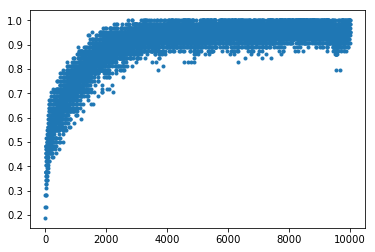

In [153]:
plt.plot(tr_acc,'.')

In [396]:
sess = tf.Session()
saver = tf.train.Saver()
saver.restore(sess, "./models/best_model.ckpt")#到我們剛剛存檔的路徑將檔案叫出來，放入graph中對應的參數位置

INFO:tensorflow:Restoring parameters from ./models/best_model.ckpt


In [157]:
max(te_acc)

0.60155520995334366

In [166]:
predict_list=[]
te_pred = sess.run(y_pred, feed_dict={
    input_data:test_data,
    drp_rate: 0,
    is_train: False
})


In [167]:
ans = np.argmax(te_pred, axis=1)

In [168]:
submission = pd.read_csv('./sample_submission.csv')
submission['class'] = ans

In [169]:
submission.to_csv('./ans.csv',index=False)